# **SpaceX  Falcon 9 First Stage Landing Prediction**

  ## Objectives
Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

- Exploratory Data Analysis
- Preparing Data  Feature Engineering 


In [1]:
# Import the necessary libraries
import matplotlib.pyplot as plt   # For plotting graphs and visualization
import seaborn           as sns   # For plotting graphs and visualization
import pandas            as pd    # For data manipulation and analysis
import numpy             as np    # For numerical operations

## Exploratory Data Analysis 

In [ ]:
# Read the SpaceX dataset into a Pandas data frame 
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# Display the first five rows of the dataset
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [3]:
# Determine the number of occurrences of each class in the 'Outcome' column
df['Outcome'].value_counts()

Outcome
True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: count, dtype: int64

In [4]:
# Identify which columns are numerical and categorical.
df.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
Class               int64
dtype: object

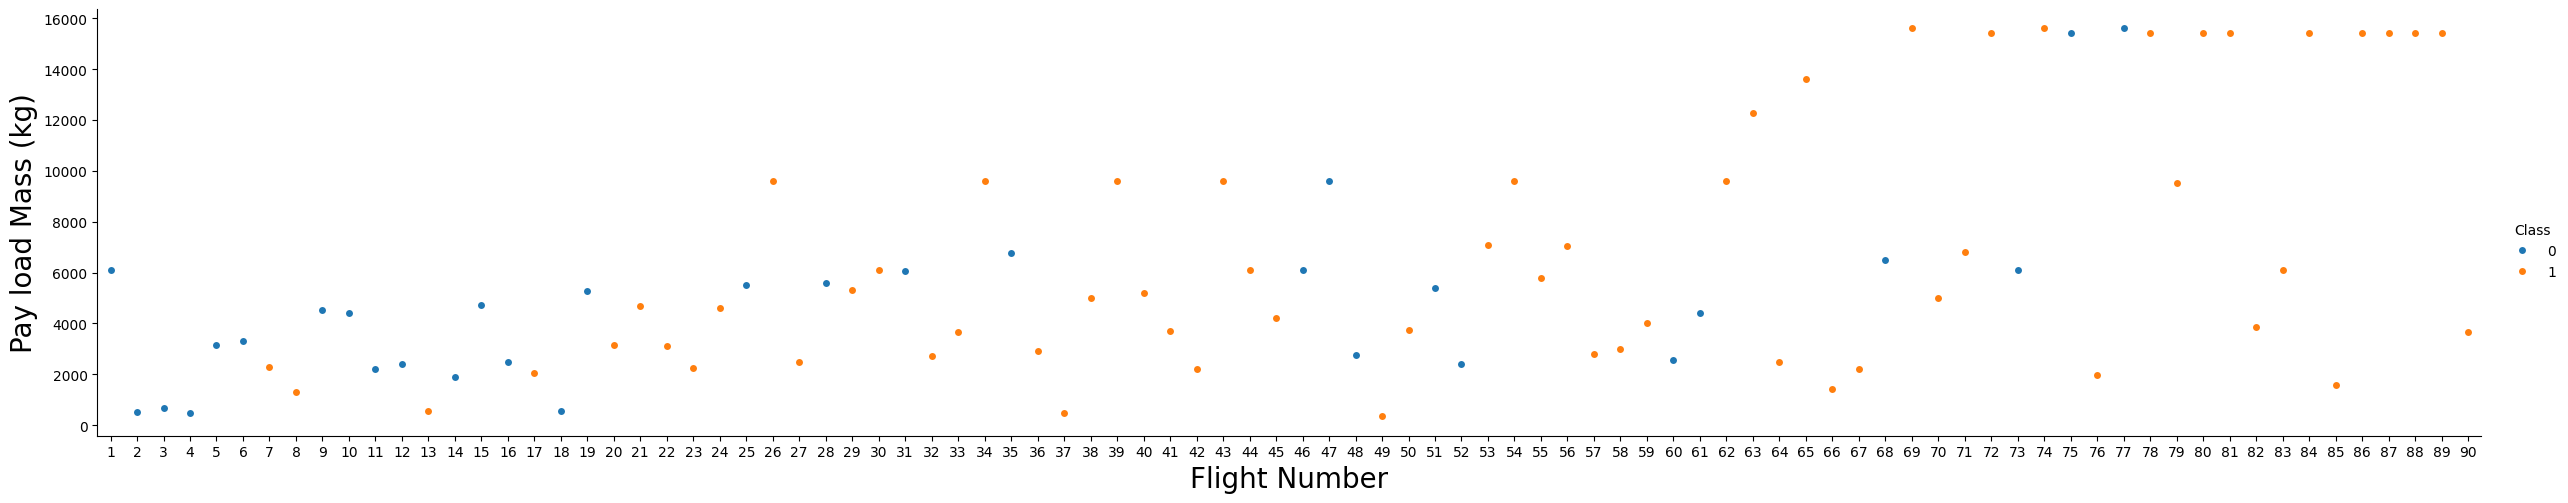

In [5]:
# Visualize FlightNumber vs. PayloadMass to overlay the outcome of the launch.
sns.catplot(y      = "PayloadMass",
            x      = "FlightNumber", 
            hue    = "Class", 
            data   =  df, 
            aspect =  5)

plt.xlabel("Flight Number",      fontsize = 20)
plt.ylabel("Pay load Mass (kg)", fontsize = 20)
plt.show()

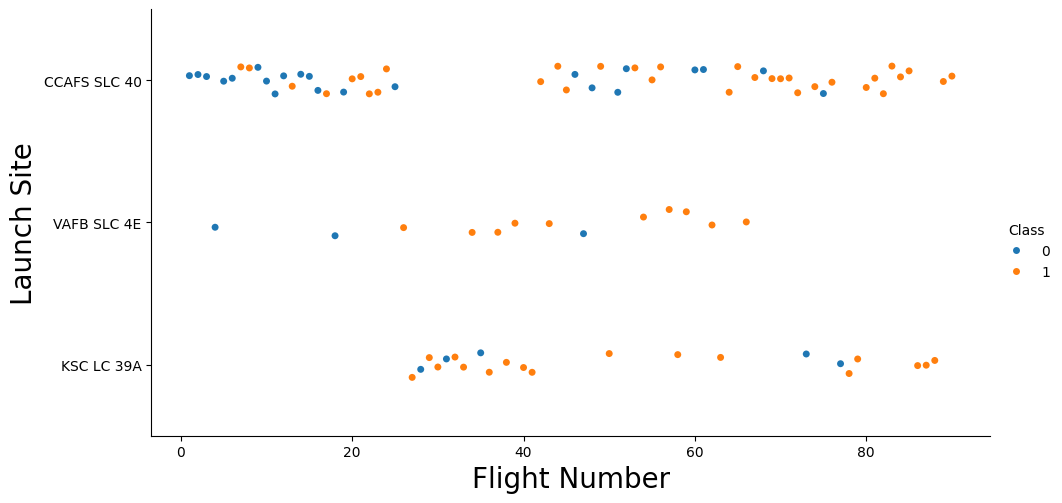

In [6]:
# Visualize the relationship between Flight Number and Launch Site
sns.catplot(x      = 'FlightNumber', 
            y      = 'LaunchSite', 
            hue    = 'Class', 
            data   =  df, 
            aspect =  2)

plt.xlabel('Flight Number', fontsize = 20)
plt.ylabel('Launch Site',   fontsize = 20)
plt.show() 

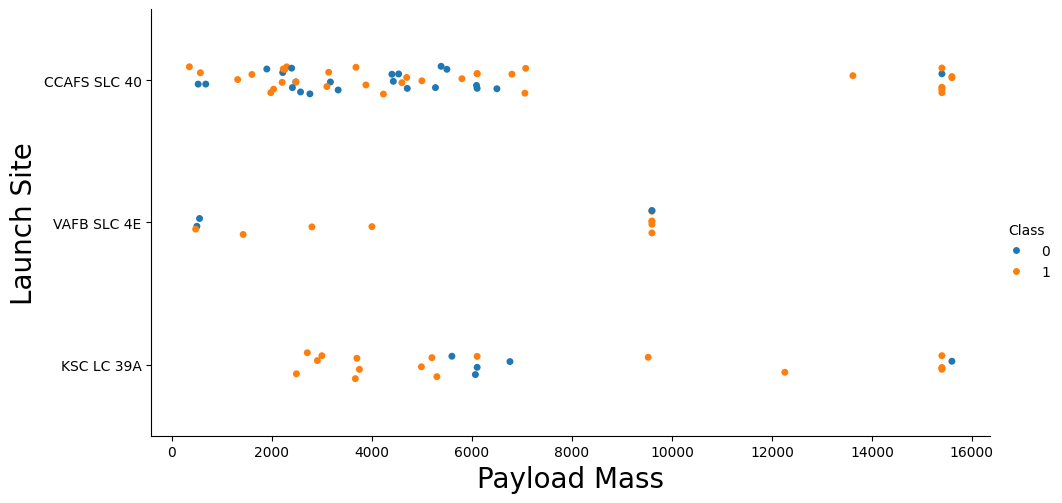

In [7]:
# Visualize the relationship between Payload and Launch Site
sns.catplot(x      = 'PayloadMass', 
            y      = 'LaunchSite', 
            hue    = 'Class', 
            data   =  df, 
            aspect =  2)

plt.xlabel('Payload Mass', fontsize = 20)
plt.ylabel('Launch Site', fontsize  = 20)
plt.show() 

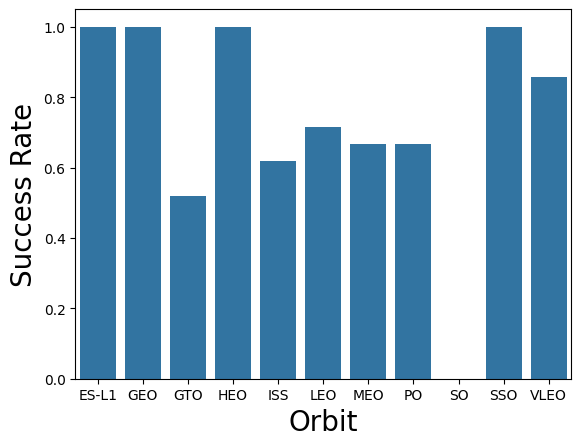

In [8]:
# Group the data by the 'Launch Site' column and calculate the mean of the 'PayloadMass' column
df_groupby = df.groupby(['Orbit'])['Class'].mean().reset_index()

# Visualize the relationship between success rate of each orbit type
sns.barplot(x    = 'Orbit', 
            y    = 'Class', 
            data = df_groupby)

plt.xlabel('Orbit',        fontsize = 20)
plt.ylabel('Success Rate', fontsize = 20)
plt.show()

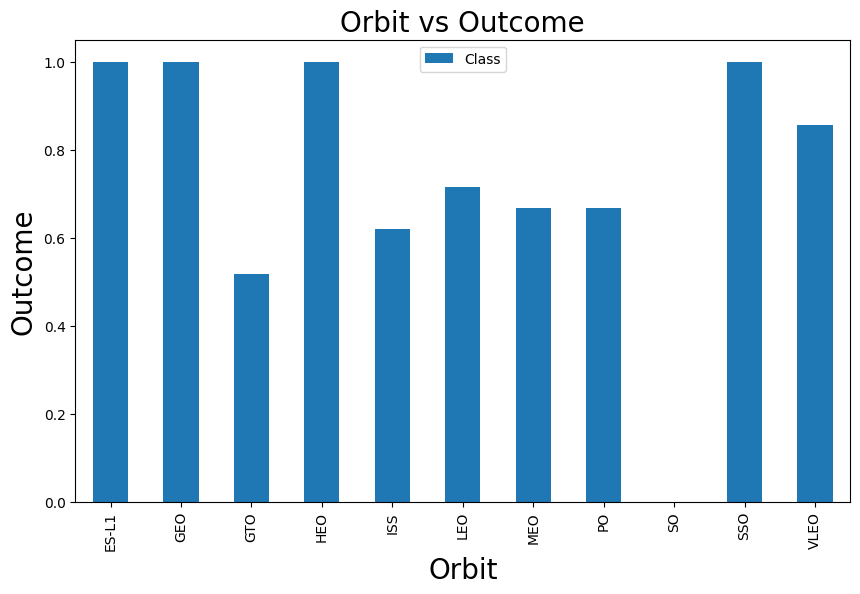

In [9]:
# Group the data by the 'LandingPad' column and calculate the mean of the 'Class' column
orbit_class_mean = df.groupby('Orbit')['Class'].mean().reset_index()
orbit_class_mean

# Visualize the relationship between success rate of each orbit type
orbit_class_mean.plot(kind    = 'bar', 
                      x       = 'Orbit', 
                      y       = 'Class', 
                      figsize = (10, 6))

plt.xlabel('Orbit',           fontsize = 20)
plt.ylabel('Outcome',         fontsize = 20)
plt.title('Orbit vs Outcome', fontsize = 20)
plt.show()

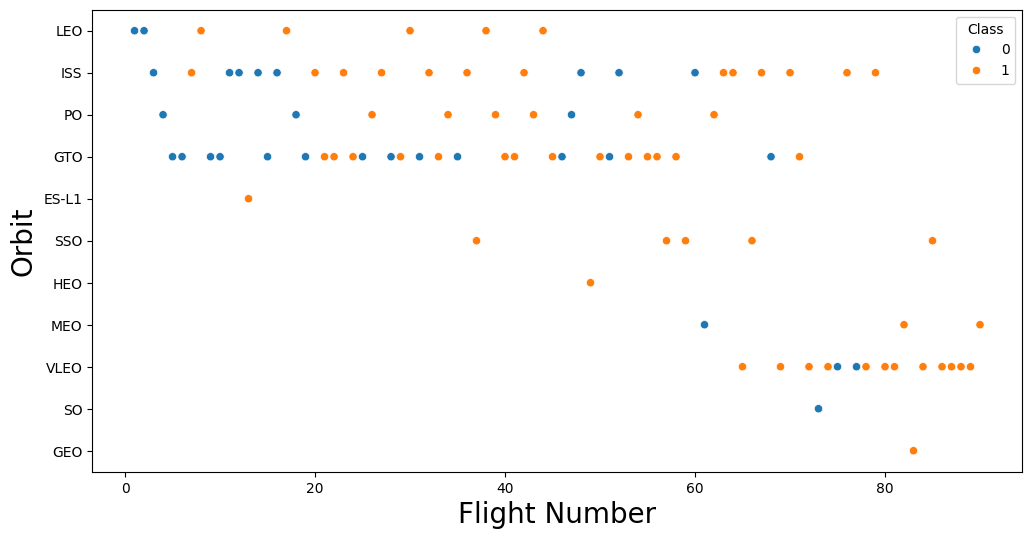

In [13]:
# Visualize the relationship between FlightNumber and Orbit type
plt.figure(figsize   = (12, 6))
sns.scatterplot(x    = 'FlightNumber', 
                y    = 'Orbit', 
                hue  = 'Class', 
                data = df)

plt.xlabel('Flight Number', fontsize = 20)
plt.ylabel('Orbit',         fontsize = 20)
plt.show()

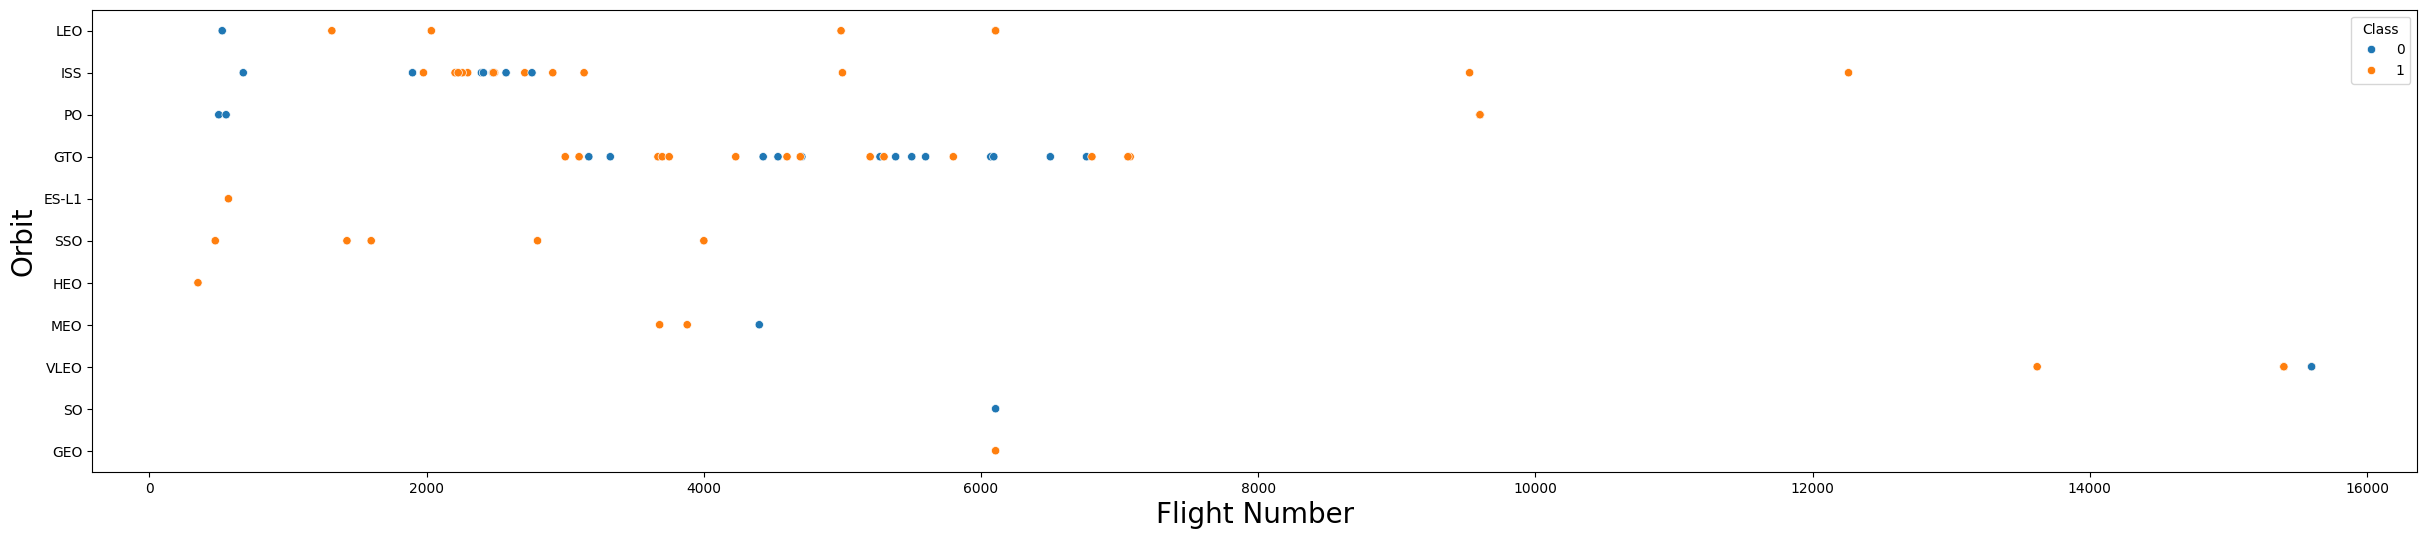

In [11]:
# Visualize the relationship between Payload and Orbit type
plt.figure(figsize = (30, 6))
sns.scatterplot(x    = 'PayloadMass', 
                y    = 'Orbit', 
                hue  = 'Class', 
                data =  df)

plt.xlabel('Flight Number', fontsize = 20)
plt.ylabel('Orbit',         fontsize = 20)
plt.show()

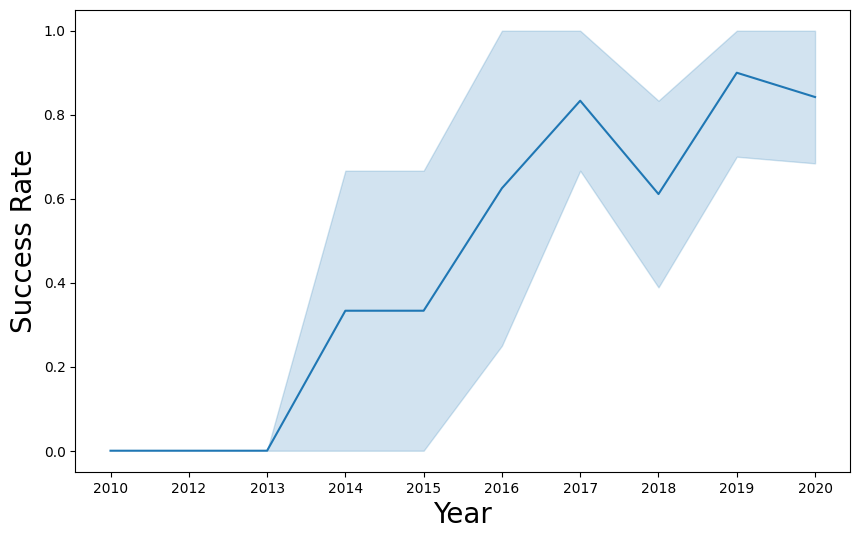

In [12]:
# A function to extract the year from the date
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

# Extract the year and store it in a new column named 'Year'
year = Extract_year(df['Date'])

# Visualize the launch success yearly trend
plt.figure(figsize = (10, 6))
sns.lineplot(x    =  year, 
             y    = 'Class', 
             data =  df)

plt.xlabel('Year',         fontsize = 20)
plt.ylabel('Success Rate', fontsize = 20)
plt.show()

## Features Engineering 

In [15]:
# Define the features and the target variables
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]

# Display the first five rows of the features data frame
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [16]:
# Create dummy variables to categorical columns
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

# Display the first five rows of the features_one_hot data frame
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
# Cast all numeric columns to float64
features_one_hot.astype('float64')

# Display the first five rows of the features_one_hot data frame
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
# Export the data to a CSV file
features_one_hot.to_csv('dataset_part_3.csv', index=False)

This Jupyter Notebook was Completed By [Jonathan Scott](http://www.linkedin.com/in/jonathan-scott-140709317) as Part of the IBM Data Science Certification.

## Authors

[Joseph Santarcangelo](https://www.linkedin.com/in/joseph-s-50398b136/) has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

[Nayef Abou Tayoun](https://www.linkedin.com/in/nayefaboutayoun/) is a Data Scientist at IBM and pursuing a Master of Management in Artificial intelligence degree at Queen's University.

| Date (YYYY-MM-DD) | Version | Changed By | Change Description      |
| ----------------- | ------- | ---------- | ----------------------- |
| 2021-10-12        | 1.1     | Lakshmi Holla     | Modified markdown |
| 2020-09-20        | 1.0     | Joseph     | Modified Multiple Areas |
| 2020-11-10       | 1.1    | Nayef      | updating the input data |

Copyright © 2020 IBM Corporation. All rights reserved.